# Avocado Data Analysis

## Business Understanding

The aim of this project is to find:
    1. Which region have the lowest and highest prices of Avocado?
    2. Which region has highest Avocado production?
    3. What is the average avocado prices in each year?
    4. What is the average avocado volume in each year?

# Dataset Content
The Avocado dataset has been used in this project.

Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

# Import necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data

In [15]:
df = pd.read_csv(r'/Users/rekhanthreddyobireddy/Documents/Naresh I Tech/ML/May2nd- REGRESSION PROJECT/RESUME PROJECT -- PRICE PREDICTION/avocado.csv')

In [17]:
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [19]:
df.head()     # head function returns the first `5` rows

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Detect missing values

In [27]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [43]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Dropping uncessary columns

In [49]:
df = df.drop(['Unnamed: 0','Date','4046','4225','4770'],axis=1, errors = 'ignore')
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [53]:
def get_average(df,column):
    return sum(df[column])/len(df)
    #return df[column].mean()

In [73]:
def column_group_average_manual(df, column1, column2):
    unique_values = list(df[column1].unique())
    average = []

    for val in unique_values:
        subset = df[df[column1]==val]
        avg = get_average(subset, column2)
        #avg = subset[column2].mean()
        average.append(avg)


    result_df  = pd.DataFrame({column1: unique_values, f'avg_(column2)': average})
    sorted_df = result_df.sort_values(by = f'avg_(column2)', ascending= False).reset_index(drop=True)       # reset_index cleans up the index after sorting.

    return sorted_df


# Mean using in-built func
# def average_between_columns(df, column1, column2):
#     # Calculate row-wise average
#     df['Average'] = df[[column1, column2]].mean(axis=1)

#     # Return sorted DataFrame by 'Average'
#     return df.sort_values(by='Average', ascending=False)


In [89]:
def plot(data, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    
    # Dynamic column access
    ax = sns.barplot(x = data[xlabel], y = data[ylabel], palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(f'Average{ylabel} of Avocado according to {xlabel}')
    plt.tight_layout()
    plt.show()

In [95]:
print(data1.columns)

Index(['region', 'avg_(column2)'], dtype='object')


# 1. Which region have the lowest and highest prices of Avocado?

/var/folders/35/yvvs6n8n4237g5bwqvw0gj3m0000gn/T/ipykernel_834/2843681507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data[xlabel], y = data[ylabel], palette='rocket')


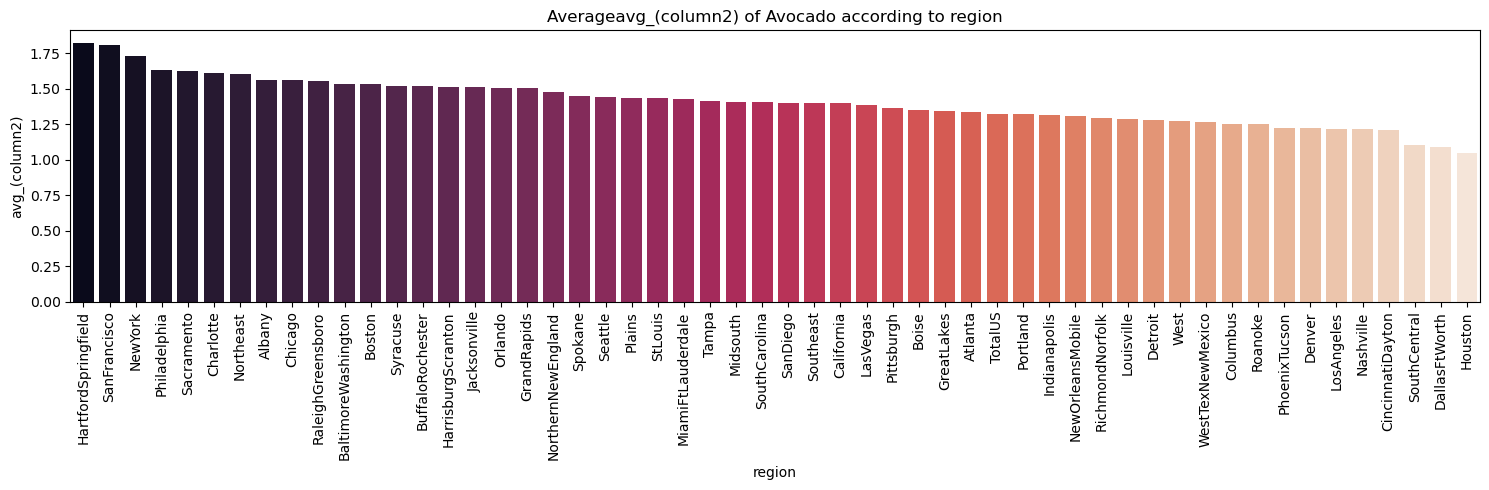

In [97]:
data1 = column_group_average_manual(df, 'region', 'AveragePrice')
plot(data1, 'region', 'avg_(column2)')

In [102]:
print(data1['region'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


In [106]:
print(data1['region'].iloc[0], " is the region producing avocado with the highest price.")

HartfordSpringfield  is the region producing avocado with the highest price.


# Which region has highest Avocado production?

Index(['region', 'avg_(column2)'], dtype='object')


Text(0.5, 1.0, 'Figure: Boxplot representing outlier columns.')

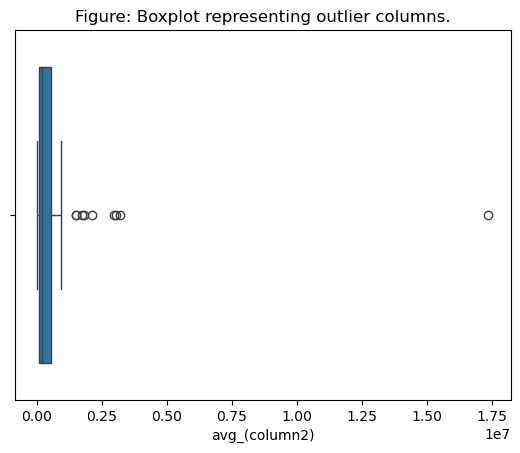

In [125]:
data2 = column_group_average_manual(df,'region','Total Volume')
print(data2.columns)
column_name = 'avg_(column2)'
ax = sns.boxplot(x=data2[column_name])
ax.set_title("Figure: Boxplot representing outlier columns.")

In [129]:
outlier_region = data2[data2['avg_(column2)']>10000000]
print(outlier_region['region'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [147]:
# Find outliers
outlier_region = data2[data2['avg_(column2)'] > 10000000]

# Drop outlier rows from data2, but only if there are any outliers
if not outlier_region.empty:
    data2 = data2.drop(outlier_region.index, axis=0)
    print("Outliers removed.")
else:
    print("No outliers found.")

No outliers found.


/var/folders/35/yvvs6n8n4237g5bwqvw0gj3m0000gn/T/ipykernel_834/2843681507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data[xlabel], y = data[ylabel], palette='rocket')


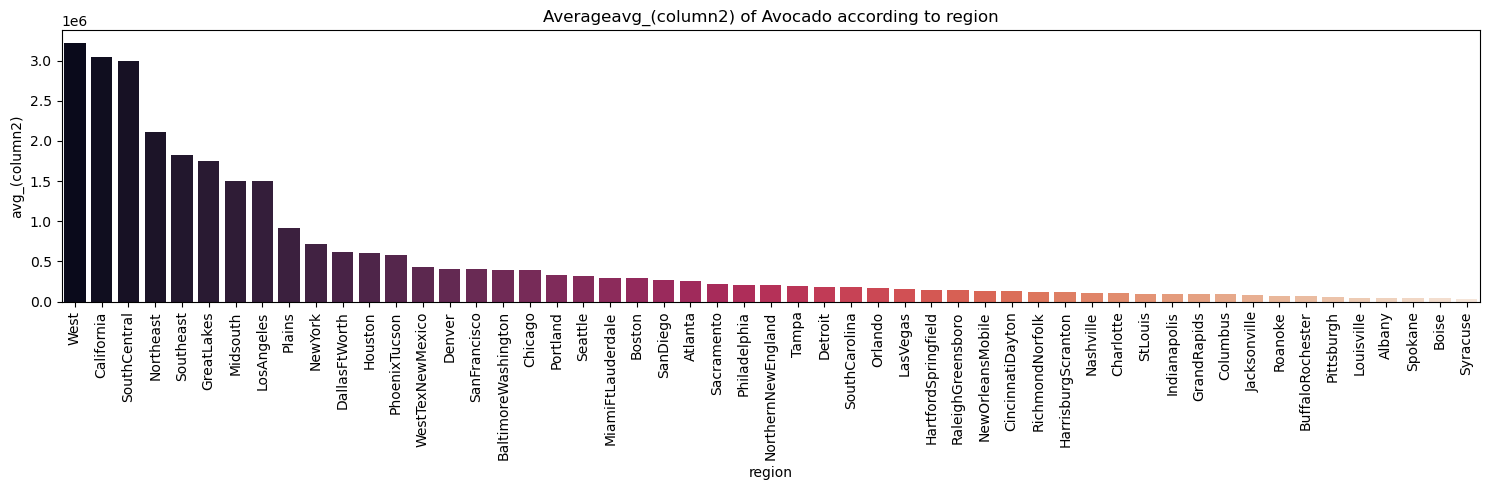

In [153]:
plot(data2,'region','avg_(column2)')

# What is the average avocado prices in each year?

In [156]:
df.columns

Index(['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

/var/folders/35/yvvs6n8n4237g5bwqvw0gj3m0000gn/T/ipykernel_834/2843681507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data[xlabel], y = data[ylabel], palette='rocket')


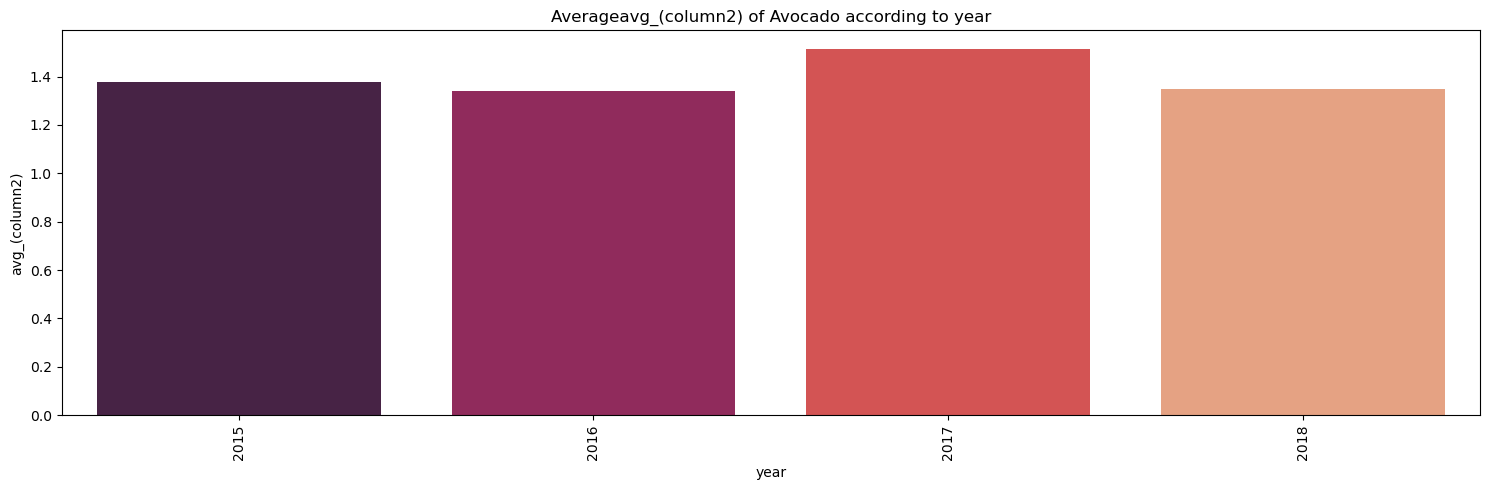

In [168]:
data3 = column_group_average_manual(df,'year','AveragePrice')

plot(data3, 'year', 'avg_(column2)')

# What is the average avocado volume in each year?

/var/folders/35/yvvs6n8n4237g5bwqvw0gj3m0000gn/T/ipykernel_834/2843681507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data[xlabel], y = data[ylabel], palette='rocket')


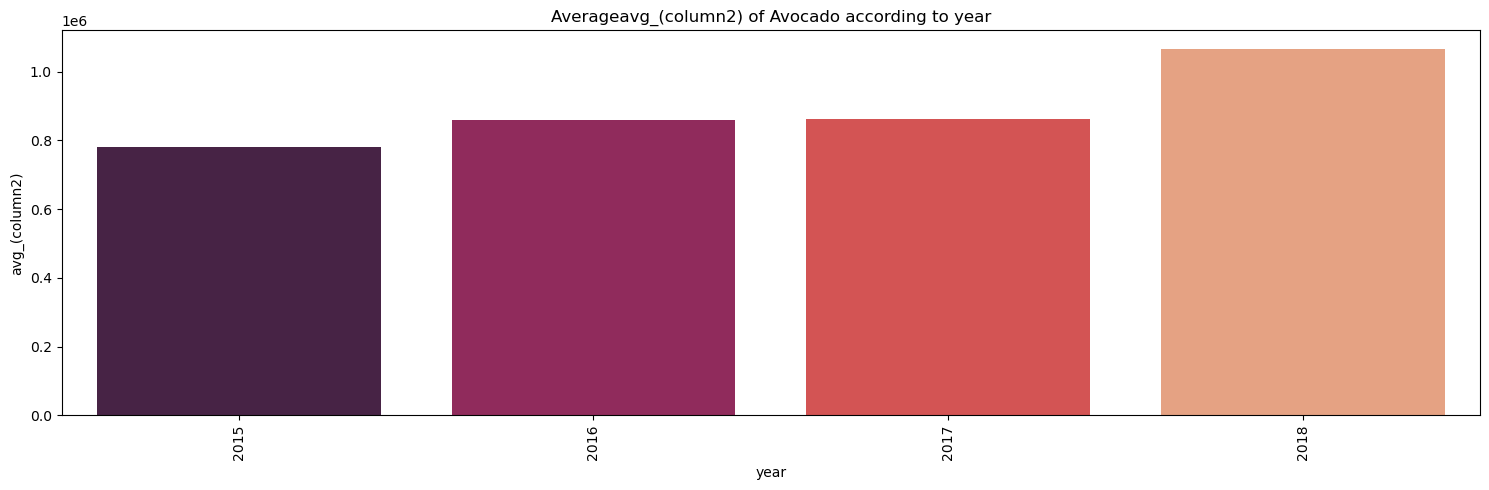

In [173]:
data4 = column_group_average_manual(df,'year','Total Volume')
plot(data4, 'year', 'avg_(column2)')

# Data Modeling

# We will build the regrestion model by used [Linear regresion from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to predict the avocado price.

In [183]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   Small Bags    18249 non-null  float64
 4   Large Bags    18249 non-null  float64
 5   XLarge Bags   18249 non-null  float64
 6   type          18249 non-null  int8   
 7   year          18249 non-null  int64  
 8   region        18249 non-null  int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [187]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [189]:
# split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# split data into traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [191]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [195]:
# bulid and fit the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [197]:
# prediction and calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.87220346807907


In [199]:
# prediction and calculate the accuracy for the testing dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.609338823714026


The model doesn't work well with this dataset, In order to the avocado prices were near together